## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mergeDf = pd.merge(study_results, mouse_metadata,how='left',on='Mouse ID')
mergeDf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
mergeDf["Mouse ID"].nunique()

249

In [3]:
dupe = mergeDf.groupby(['Mouse ID','Timepoint']).size()
dupe = dupe.reset_index()
dupe.columns = ['Mouse ID','Timepoint','Count']
dupe.sort_values(by="Count",ascending=False)
dupe

,Mouse ID,Timepoint,Count
0,a203,0,1
1,a203,5,1
2,a203,10,1
3,a203,15,1
4,a203,20,1
...,...,...,...
1883,z969,25,1
1884,z969,30,1
1885,z969,35,1
1886,z969,40,1


In [4]:
mask = mergeDf['Mouse ID'] == 'g989'
mergeDf.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
mask = mergeDf["Mouse ID"] != 'g989'
df = mergeDf.loc[mask].reset_index(drop=True)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
tumorStatsDf = pd.DataFrame()
tumorStatsDf['Tumor Mean'] = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumorStatsDf['Tumor Median'] = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorStatsDf['Tumor Variance'] = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorStatsDf['Tumor Standard Deviation'] = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorStatsDf['Tumor SEM'] = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumorStatsDf


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

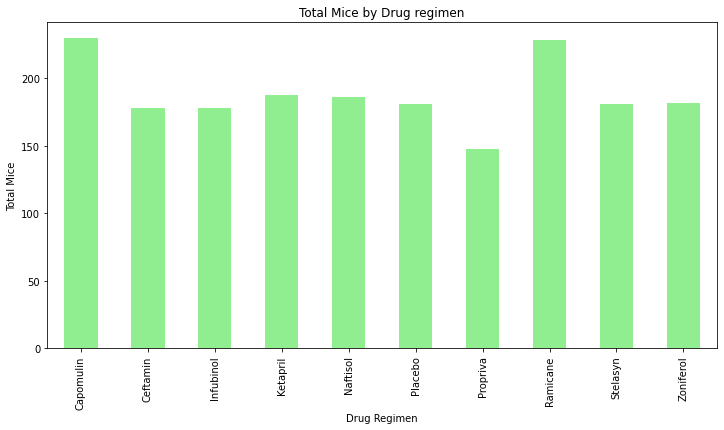

In [9]:
drugGroup = df.groupby(['Drug Regimen'])
uniqueMice = drugGroup['Mouse ID'].count()

uniqueDrugChart = uniqueMice.plot(kind="bar", title="Total Mice by Drug regimen",color='lightgreen',align='center',figsize=(12,6))
uniqueDrugChart.set_xlabel("Drug Regimen")
uniqueDrugChart.set_ylabel("Total Mice")

plt.show()


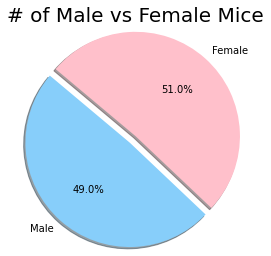

In [10]:
genderGroup = df.groupby(['Sex'])['Mouse ID'].count()
genderLabels = ['Male','Female']
genderColors = ['lightskyblue','pink']
genderExplode = (0.1,0)
genderChart = plt.pie(genderGroup, labels=genderLabels, explode=genderExplode, colors=genderColors, autopct="%1.1f%%", shadow=True, startangle=140,radius=1.2)
plt.title("# of Male vs Female Mice",fontsize=20)
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
maxDf = df.groupby(['Mouse ID','Drug Regimen']).Timepoint.max().reset_index()

subDf = pd.merge(maxDf,df, on=['Mouse ID','Drug Regimen','Timepoint'],how='left')
subDf


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [12]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

mask = [True if x in treatments else False for x in subDf['Drug Regimen']]
tumorDf = subDf.loc[mask].reset_index(drop=True)
   

In [13]:
maskC = tumorDf['Drug Regimen'] == 'Capomulin'
capomulinDf = tumorDf[maskC].reset_index()


maskR = tumorDf['Drug Regimen'] == 'Ramicane'
ramicaneDf = tumorDf[maskR].reset_index()


maskI = tumorDf['Drug Regimen'] == 'Infubinol'
infubinolDf = tumorDf[maskI].reset_index()
infubinolDf

maskCe = tumorDf['Drug Regimen'] == 'Ceftamin'
ceftaminDf = tumorDf[maskCe].reset_index()


Text(0.5, 1.0, 'Boxplots of Capomulin, Ramicane, Infubinol, and Ceftamin')

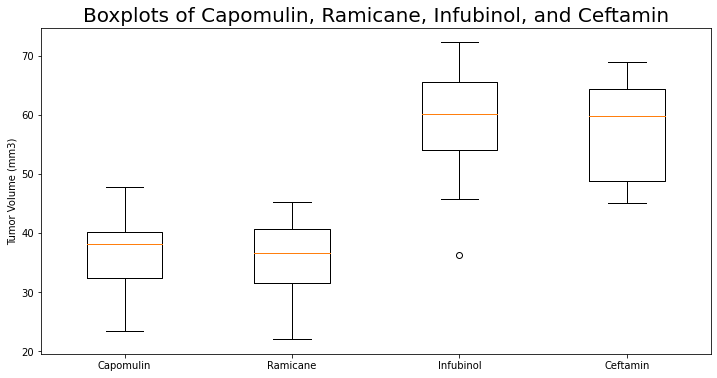

In [14]:
tumorDict = {'Capomulin': capomulinDf['Tumor Volume (mm3)'], 'Ramicane': ramicaneDf['Tumor Volume (mm3)'],'Infubinol' : infubinolDf['Tumor Volume (mm3)'],'Ceftamin' : ceftaminDf['Tumor Volume (mm3)']}

fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(tumorDict.values())
ax.set_xticklabels(tumorDict.keys())
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title("Boxplots of Capomulin, Ramicane, Infubinol, and Ceftamin",fontsize=20)

## Line and Scatter Plots

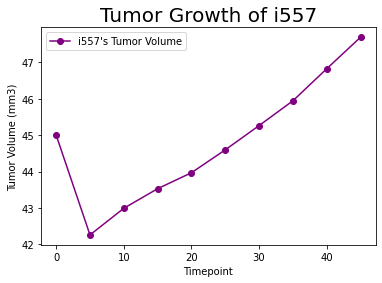

In [15]:
mouse = 'i557'
maskM = df['Mouse ID'] == mouse
mouseDf = df[maskM].reset_index()
mousePlot = plt.plot(mouseDf['Timepoint'], mouseDf['Tumor Volume (mm3)'], color="purple", label=f"{mouse}'s Tumor Volume",marker='o',)
plt.legend( loc="best")
plt.title(f"Tumor Growth of {mouse}",fontsize=20)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

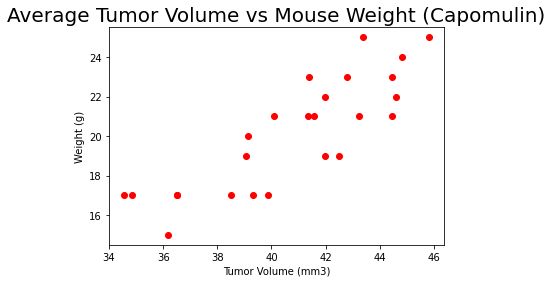

In [16]:
maskX = df['Drug Regimen'] == 'Capomulin'
scatterDf = df[maskX].reset_index()
scatterDf.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume_(mm3)", "Weight (g)": "Weight"})
scatterDf
tempDf = pd.DataFrame()
tempDf = scatterDf.groupby(['Mouse ID']).mean()


plt.title("Average Tumor Volume vs Mouse Weight (Capomulin)",fontsize=20)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

plt.scatter(tempDf['Tumor Volume (mm3)'], tempDf['Weight (g)'], marker="o", color="red")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717




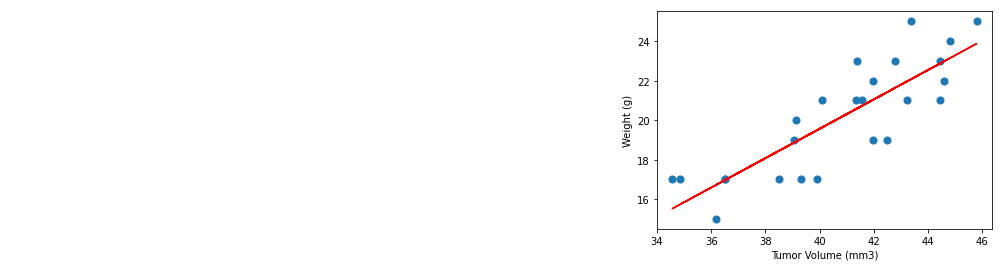

In [17]:
x_values = tempDf['Tumor Volume (mm3)']
y_values = tempDf['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,s=50)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=20,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}\n\n")
plt.show()
